In [70]:
!pip install numpy==1.22.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import datetime

df = pd.read_csv("/kaggle/input/yahoo-finance-all-stocks-dataset-daily-update/AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


In [71]:
df =df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1,1,1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
2,2,1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
3,3,1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
4,4,1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


In [72]:
df.tail()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10689,10689,2023-05-08 00:00:00-04:00,172.241750,173.609868,171.872266,173.260345,55962800,0.00,0.0
10690,10690,2023-05-09 00:00:00-04:00,172.810976,173.300290,171.362982,171.532745,45326900,0.00,0.0
10691,10691,2023-05-10 00:00:00-04:00,172.781019,173.789619,171.662556,173.320267,53724500,0.00,0.0
10692,10692,2023-05-11 00:00:00-04:00,173.609878,174.348846,171.932190,173.510010,49514700,0.00,0.0
10693,10693,2023-05-12 00:00:00-04:00,173.619995,174.059998,171.000000,172.570007,45497800,0.24,0.0


In [73]:
#start_date = '2022-01-02'
#end_date = '2022-01-04'
#df_slice = df.loc[start_date:end_date]
#insert_index = pd.to_datetime('2022-01-06')
#df = pd.concat([df.loc[:insert_index], df_slice, df.loc[insert_index:]])

In [74]:
df = df.drop('Date', axis=1)
df = df.drop('Dividends', axis=1)
df = df.drop('Stock Splits', axis=1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,0.099584,0.100017,0.099584,0.099584,469033600
1,1,0.094821,0.094821,0.094388,0.094388,175884800
2,2,0.087893,0.087893,0.087461,0.087461,105728000
3,3,0.089625,0.090058,0.089625,0.089625,86441600
4,4,0.092224,0.092657,0.092224,0.092224,73449600


In [75]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
10689    150.128168
10690    150.393019
10691    150.698280
10692    151.072344
10693    151.456850
Name: Close, Length: 10694, dtype: float64

Text(0.5, 0, 'Days')

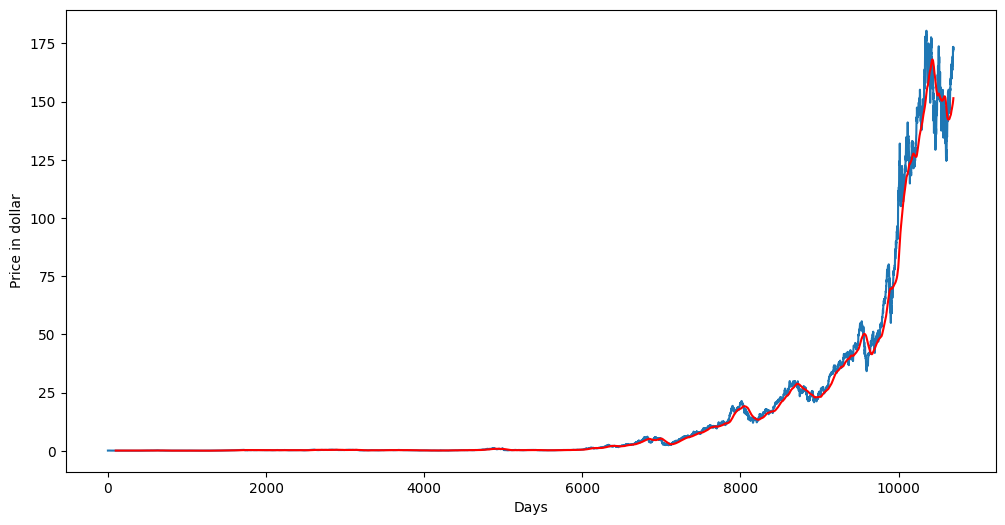

In [76]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.ylabel('Price in dollar')
plt.xlabel('Days')



In [77]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
10689    150.990027
10690    151.081814
10691    151.188205
10692    151.302254
10693    151.385808
Name: Close, Length: 10694, dtype: float64

Text(0.5, 0, 'Days')

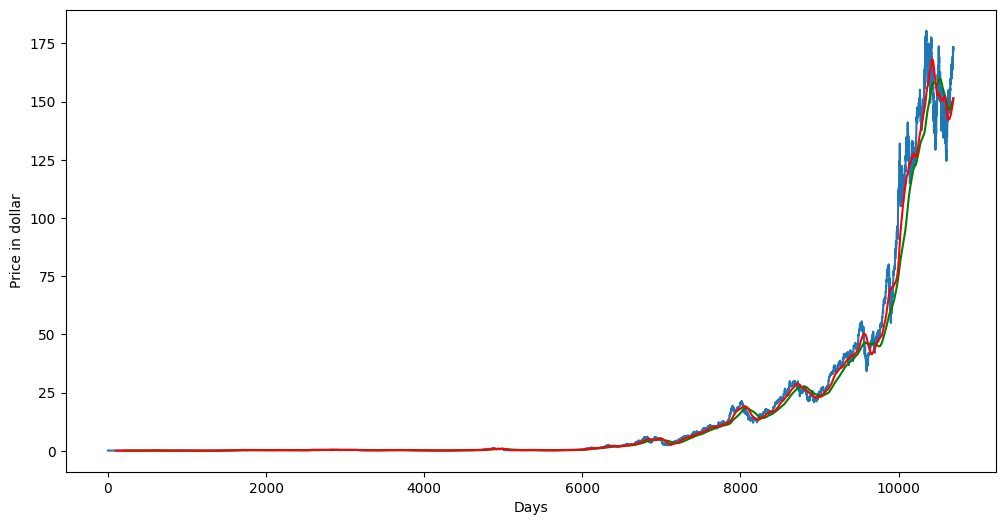

In [78]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma200, 'g')
plt.plot(ma100, 'r')
plt.ylabel('Price in dollar')
plt.xlabel('Days')

In [79]:
df.shape

(10694, 6)

In [80]:
#Splitting into data feaming and data testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [81]:
print(data_training.shape)
print(data_testing.shape)

(7485, 1)
(3209, 1)


In [82]:
data_training.head()

,Close
0,0.099584
1,0.094388
2,0.087461
3,0.089625
4,0.092224


In [83]:
data_testing.head()

,Close
7485,7.561454
7486,7.517136
7487,7.648574
7488,7.681966
7489,7.585131


In [84]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler is a normalization technique that scales and transforms data to a fixed range, typically between 0 and 1.
scaler = MinMaxScaler(feature_range=(0,1))

In [85]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00742421],
       [0.00679685],
       [0.00596028],
       ...,
       [0.94626416],
       [0.91246823],
       [0.91833337]])

In [86]:
x_train = []
y_train = []

for i in range(100, len(data_training_array)):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i])

x_train, y_train = np.array(x_train), np.array(y_train)

In [87]:
x_train.shape

(7385, 100, 1)

In [88]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [89]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
          
# layer 2
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.4))                
               
# layer 3
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))               
          
# layer 4
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
        
model.add(Dense(units=1))

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [91]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
231/231 [==============================] - 62s 243ms/step - loss: 0.0053
Epoch 2/50
231/231 [==============================] - 56s 241ms/step - loss: 0.0022
Epoch 3/50
231/231 [==============================] - 57s 245ms/step - loss: 0.0019
Epoch 4/50
231/231 [==============================] - 56s 244ms/step - loss: 0.0020
Epoch 5/50
231/231 [==============================] - 57s 246ms/step - loss: 0.0018
Epoch 6/50
231/231 [==============================] - 57s 247ms/step - loss: 0.0019
Epoch 7/50
231/231 [==============================] - 58s 250ms/step - loss: 0.0016
Epoch 8/50
231/231 [==============================] - 57s 247ms/step - loss: 0.0015
Epoch 9/50
231/231 [==============================] - 58s 252ms/step - loss: 0.0013
Epoch 10/50
231/231 [==============================] - 60s 259ms/step - loss: 0.0014
Epoch 11/50
231/231 [==============================] - 60s 261ms/step - loss: 0.0014
Epoch 12/50
231/231 [==============================] - 58s 250ms/step - lo

In [94]:
model.save('keras_model.h5')

In [95]:
data_training.tail()

,Close
7480,7.895061
7481,7.945446
7482,7.874414
7483,7.594540
7484,7.643111


In [96]:
past_100_days = data_training.tail(100)

In [97]:
final_df = past_100_days.append(data_testing,ignore_index= True)

/tmp/ipykernel_34/227668043.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index= True)


In [98]:
final_df.head()

,Close
0,6.931889
1,6.962548
2,6.879984
3,7.008992
4,7.054222


In [99]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.99068793e-04],
       [4.75723573e-04],
       [0.00000000e+00],
       ...,
       [9.59009783e-01],
       [9.60103060e-01],
       [9.54686874e-01]])

In [100]:
input_data.shape

SyntaxError: invalid syntax (1189770672.py, line 1)

In [101]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(3209, 100, 1)
(3209,)


In [102]:
# Making predictions 
y_predicted = model.predict(x_test)

101/101 [==============================] - 8s 73ms/step


In [103]:
y_predicted.shape

array([[0.05808818],
       [0.05809172],
       [0.05806537],
       ...,
       [0.8599653 ],
       [0.86312544],
       [0.8661376 ]], dtype=float32)

In [ ]:
y_test

In [104]:
y_predicted

array([[0.05808818],
       [0.05809172],
       [0.05806537],
       ...,
       [0.8599653 ],
       [0.86312544],
       [0.8661376 ]], dtype=float32)

In [105]:
scaler.scale_

array([0.00576189])

In [108]:
scale_factor = 1/0.2099517
y_predicted = y_predicted * scale_factor 
y_test = y_test * scale_factor 

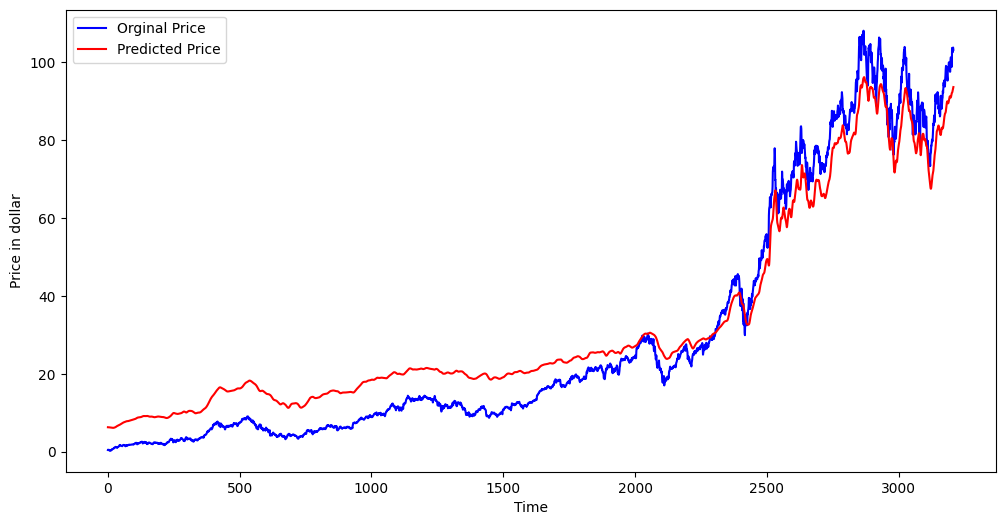

In [109]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Orginal Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.ylabel('Price in dollar')
plt.xlabel('Time')
plt.legend()
plt.show()